In [98]:
import pandas as pd
import matplotlib.pylab as plt

In [99]:
#If this notebook is runned locally using Anaconda, you can load the correct library and versions by uncommenting the following:
#install specific version of libraries used in lab
#! mamba install pandas==1.3.3
#! mamba install numpy=1.21.2

In [100]:
#This function will download the dataset into your browser 
#from pyodide.http import pyfetch

#async def download(url, filename):
   # response = await pyfetch(url)
    #if response.status == 200:
     #   with open(filename, "wb") as f:
      #      f.write(await response.bytes())

In [101]:
filename = "automobile.csv"
df = pd.read_csv(filename, header=0)
df.head(10)


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
5,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
7,1,?,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
9,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,?


In [102]:
#the dataset will need to be downloaded ; if you are running locally, please comment out the following
#await download(filename, "auto.csv")
#filename="auto.csv"

In [103]:
#IDENTIFY AND HANDLE MISSING DATA
#1. Identify missing data
#2. Deal with missing data
#3. Correct data format

In [104]:
#1. Identify missing values
#Convert "?" to NaN
#In the car dataset, missing data comes with the question mark "?". We replace "?" with NaN (Not a Number), 
#Python's default missing value marker for reasons of computational speed and convenience. Here we use the function:
import numpy as np

df.replace("?", np.nan, inplace = True)
df.head(10)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
5,2,NaN,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
7,1,NaN,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
9,0,NaN,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,NaN


In [105]:
#Evaluating for Missing Data
#The missing values are converted by default. We use the following functions to identify these missing values. 
#There are two methods to detect missing data:

#.isnull()
#.notnull()
#The output is a boolean value indicating whether the value that is passed into the argument is in fact missing data.
missing_data = df.isnull()
missing_data.head(10)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [106]:
#Count missing values in each column
#"True" represents a missing value and "False" means the value is present in the dataset. 
#In the body of the for loop the method ".value_counts()" counts the number of "True" values.
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")

symboling
False    205
Name: symboling, dtype: int64

normalized-losses
False    164
True      41
Name: normalized-losses, dtype: int64

make
False    205
Name: make, dtype: int64

fuel-type
False    205
Name: fuel-type, dtype: int64

aspiration
False    205
Name: aspiration, dtype: int64

num-of-doors
False    203
True       2
Name: num-of-doors, dtype: int64

body-style
False    205
Name: body-style, dtype: int64

drive-wheels
False    205
Name: drive-wheels, dtype: int64

engine-location
False    205
Name: engine-location, dtype: int64

wheel-base
False    205
Name: wheel-base, dtype: int64

length
False    205
Name: length, dtype: int64

width
False    205
Name: width, dtype: int64

height
False    205
Name: height, dtype: int64

curb-weight
False    205
Name: curb-weight, dtype: int64

engine-type
False    205
Name: engine-type, dtype: int64

num-of-cylinders
False    205
Name: num-of-cylinders, dtype: int64

engine-size
False    205
Name: engine-size, dtype: int64

fuel-system
Fa

In [107]:
#As we can see, every column has 205 rows of data, and it shows how many of these are missing values.

In [108]:
#2. Deal with missing data
#2a. Drop data (column or row)

#In our dataset, none of the columns are empty enough to drop entirely.

#Drop the whole row:

#"price": 4 missing data, simply delete the whole row
#Reason: price is what we want to predict. Any data entry without price data cannot be used for 
#prediction; therefore any row now without price data is not useful to us.

# drop whole row with NaN in "price" column
df.dropna(subset=["price"], axis=0)
# reset index, because we dropped two rows
df.reset_index(drop=True, inplace=True)

In [109]:
#2b. Replace missing data
#We will apply each method to many different columns:

In [110]:
#Replace by mean:

#"normalized-losses": 41 missing data, replace them with mean
avg_norm_loss = df["normalized-losses"].astype("float").mean(axis=0)
print("Average of normalized-losses:", avg_norm_loss)
#replace NaN with the mean
df["normalized-losses"].replace(np.nan, avg_norm_loss, inplace=True)

#"stroke": 4 missing data, replace them with mean
avg_stroke = df["stroke"].astype('float').mean(axis = 0)
print("Average of stroke:", avg_stroke)
df["stroke"].replace(np.nan, avg_stroke, inplace = True)

#"bore": 4 missing data, replace them with mean
avg_bore = df["bore"].astype('float').mean(axis = 0)
print("Average of bore:",avg_bore)
df["bore"].replace(np.nan, avg_bore, inplace = True)

#"horsepower": 2 missing data, replace them with mean
avg_horsepower = df['horsepower'].astype('float').mean(axis=0)
print("Average horsepower:", avg_horsepower)
df['horsepower'].replace(np.nan, avg_horsepower, inplace=True)

#"peak-rpm": 2 missing data, replace them with mean
avg_peakrpm=df['peak-rpm'].astype('float').mean(axis=0)
print("Average peak rpm:", avg_peakrpm)
df['peak-rpm'].replace(np.nan, avg_peakrpm, inplace=True)

Average of normalized-losses: 122.0
Average of stroke: 3.2554228855721337
Average of bore: 3.3297512437810957
Average horsepower: 104.25615763546799
Average peak rpm: 5125.369458128079


In [111]:
#Replace by frequency:

#"num-of-doors": 2 missing data, replace them with "four".
#Reason: 84% sedans is four doors. Since four doors is most frequent, it is most likely to occur
#To see which values are present in a particular column:
print("num-of-doors value counts are:",df['num-of-doors'].value_counts())
print("\n")
#use the ".idxmax()" method to calculate the most common type automatically
print("num-of-doors max value count is:",df['num-of-doors'].value_counts().idxmax())
#replace the missing 'num-of-doors' values by the most frequent 
df["num-of-doors"].replace(np.nan, "four", inplace=True)

num-of-doors value counts are: four    114
two      89
Name: num-of-doors, dtype: int64


num-of-doors max value count is: four


In [140]:
#Now, we have a dataset with no missing values.
df.head(255)

,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,peak-rpm,city-mpg,highway-L/100km,price,city-L/100km,horsepower-binned,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo
0,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.886584,...,5000.0,21,8.703704,13495.0,11.190476,Low,0,1,1,0
1,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.886584,...,5000.0,21,8.703704,16500.0,11.190476,Low,0,1,1,0
2,1,122,alfa-romero,two,hatchback,rwd,front,94.5,0.822681,0.905947,...,5000.0,19,9.038462,16500.0,12.368421,Medium,0,1,1,0
3,2,164,audi,four,sedan,fwd,front,99.8,0.848630,0.915629,...,5500.0,24,7.833333,13950.0,9.791667,Low,0,1,1,0
4,2,164,audi,four,sedan,4wd,front,99.4,0.848630,0.918396,...,5500.0,18,10.681818,17450.0,13.055556,Low,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,four,sedan,rwd,front,109.1,0.907256,0.952974,...,5400.0,23,8.392857,16845.0,10.217391,Low,0,1,1,0
201,-1,95,volvo,four,sedan,rwd,front,109.1,0.907256,0.951591,...,5300.0,19,9.400000,19045.0,12.368421,Medium,0,1,0,1
202,-1,95,volvo,four,sedan,rwd,front,109.1,0.907256,0.952974,...,5500.0,18,10.217391,21485.0,13.055556,Medium,0,1,1,0
203,-1,95,volvo,four,sedan,rwd,front,109.1,0.907256,0.952974,...,4800.0,26,8.703704,22470.0,9.038462,Low,1,0,0,1


In [113]:
#3.Correct data format
#Let's list the data types for each column
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [114]:
df[["bore", "stroke"]] = df[["bore", "stroke"]].astype("float")
df[["normalized-losses"]] = df[["normalized-losses"]].astype("int")
df[["price"]] = df[["price"]].astype("float")
df[["peak-rpm"]] = df[["peak-rpm"]].astype("float")
df["horsepower"]=df["horsepower"].astype(int, copy=True)

In [115]:
#Let us list the columns after the conversion
df.dtypes

symboling              int64
normalized-losses      int32
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower             int32
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

In [116]:
#Now we have finally obtained the cleaned dataset with no missing values, with all data in its proper format.
#DATA STANDARDIZATION
#process of transforming data into a common format, allowing the researcher to make the meaningful comparison.
#Let's transform mpg to L/100km by mathematical operation (235 divided by mpg) by creating another column.
df['city-L/100km'] = 235/df["city-mpg"]
# check your transformed data 
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000.0,21,27,13495.0,11.190476
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000.0,21,27,16500.0,11.190476
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000.0,19,26,16500.0,12.368421
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500.0,24,30,13950.0,9.791667
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500.0,18,22,17450.0,13.055556


In [117]:
#we can also transform mpg to L/100km in the column of "highway-mpg" and change the name of column to "highway-L/100km".
# transform mpg to L/100km by mathematical operation (235 divided by mpg)
df["highway-mpg"] = 235/df["highway-mpg"]

# rename column name from "highway-mpg" to "highway-L/100km"
df.rename(columns={'highway-mpg':'highway-L/100km'}, inplace=True)

# check your transformed data 
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-L/100km,price,city-L/100km
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000.0,21,8.703704,13495.0,11.190476
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000.0,21,8.703704,16500.0,11.190476
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000.0,19,9.038462,16500.0,12.368421
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500.0,24,7.833333,13950.0,9.791667
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500.0,18,10.681818,17450.0,13.055556


In [118]:
#DATA NORMALIZATION
#is also a term for a particular type of data STANDARDIZATION where we subtract the mean and divide by the standard deviation.

In [119]:
#Example
#To demonstrate normalization, let's say we want to scale the columns "length", "width" and "height".
#Target: would like to normalize those variables, so their value ranges from 0 to 1
#Approach: replace original value by (original value)/(maximum value)
# replace (original value) by (original value)/(maximum value)
df['length'] = df['length']/df['length'].max()
df['width'] = df['width']/df['width'].max()
df['height'] = df['height']/df['height'].max() 
# show the scaled columns
df[["length","width","height"]].head()

,length,width,height
0,0.811148,0.886584,0.816054
1,0.811148,0.886584,0.816054
2,0.822681,0.905947,0.876254
3,0.848630,0.915629,0.908027
4,0.848630,0.918396,0.908027


In [120]:
#BINNING
#process of transforming continuous numerical variables into discrete categorical 'bins' for grouped analysis.

Text(0.5, 1.0, 'horsepower bins')

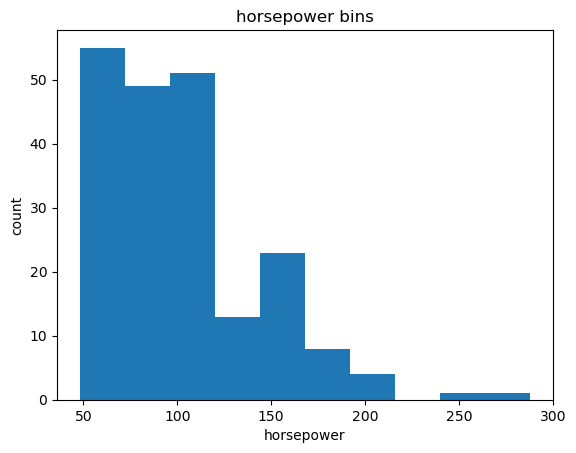

In [121]:
#Example:
#In our dataset, "horsepower" is a real valued variable ranging from 48 to 288, and it has 59 unique values. What if we only
#care about the price difference between cars with high horsepower, medium horsepower, and little horsepower (3 types)? Can we
#rearrange them into three 'bins' to simplify analysis?
#We will use the pandas method 'cut' to segment the 'horsepower' column into 3 bins.
#Let's plot the histogram of horsepower to see what the distribution of horsepower looks like.
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
plt.pyplot.hist(df["horsepower"])

# set x/y labels and plot title
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

In [122]:
#We would like 3 bins of equal size bandwidth so we use numpy's linspace(start_value, end_value, numbers_generated function.
#Since we want to include the minimum value of horsepower, we want to set start_value = min(df["horsepower"]).
#Since we want to include the maximum value of horsepower, we want to set end_value = max(df["horsepower"]).
#Since we are building 3 bins of equal length, there should be 4 dividers, so numbers_generated = 4.
bins = np.linspace(min(df["horsepower"]), max(df["horsepower"]), 4)

In [123]:
bins

array([ 48., 128., 208., 288.])

In [124]:
group_names = ['Low', 'Medium', 'High']
#We apply the function "cut" to determine what each value of df['horsepower'] belongs to.
df['horsepower-binned'] = pd.cut(df['horsepower'], bins, labels=group_names, include_lowest=True )
df[['horsepower','horsepower-binned']].head(20)

,horsepower,horsepower-binned
0,111,Low
1,111,Low
2,154,Medium
3,102,Low
4,115,Low
5,110,Low
6,110,Low
7,110,Low
8,140,Medium
9,160,Medium


In [125]:
#the number of vehicles in each bin:
df["horsepower-binned"].value_counts()

Low       163
Medium     40
High        2
Name: horsepower-binned, dtype: int64

In [126]:
#Plot of the distribution of each bin:

Text(0.5, 1.0, 'horsepower bins')

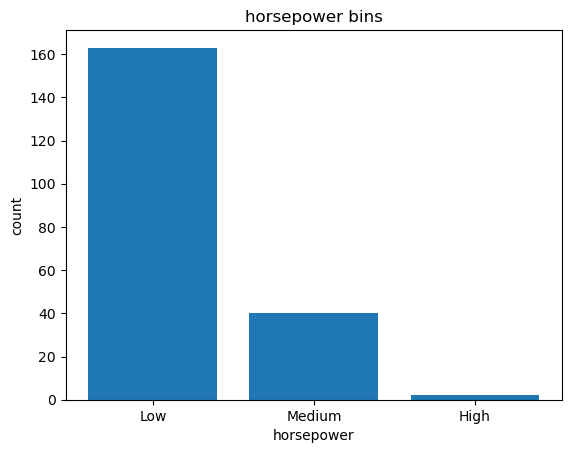

In [127]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
pyplot.bar(group_names, df["horsepower-binned"].value_counts())

# set x/y labels and plot title
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

Text(0.5, 1.0, 'horsepower bins')

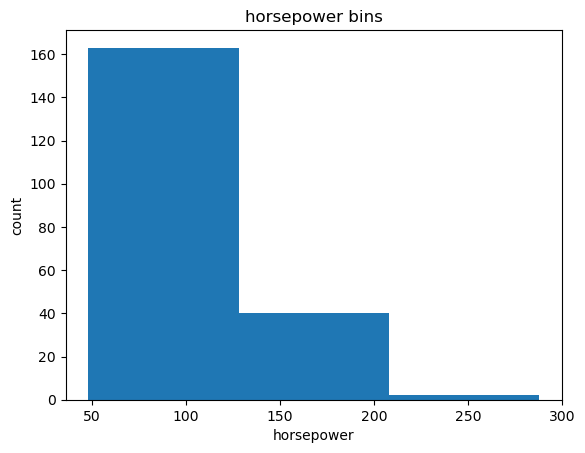

In [128]:
#A plot that shows the binning result for the attribute "horsepower"
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot


# draw histogram of attribute "horsepower" with bins = 3
plt.pyplot.hist(df["horsepower"], bins = 3)

# set x/y labels and plot title
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

In [129]:
#INDICATIOR VARIABLE
#is a numerical variable used to label categories. They are called 'dummies'
#because the numbers themselves don't have inherent meaning.
#indicator variables are used as categorical variables for regression analysis in the later modules.

In [130]:
#Example
#We see the column "fuel-type" has two unique values: "gas" or "diesel". Regression doesn't understand words,
#only numbers. To use this attribute in regression analysis, we convert "fuel-type" to indicator variables.
#We will use pandas' method 'get_dummies' to assign numerical values to different categories of fuel type.

In [131]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-L/100km', 'price', 'city-L/100km', 'horsepower-binned'],
      dtype='object')

In [132]:
dummy_variable_1 = pd.get_dummies(df["fuel-type"])
dummy_variable_1.head()

,diesel,gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [133]:
#Change the column names for clarity
dummy_variable_1.rename(columns={'gas':'fuel-type-gas', 'diesel':'fuel-type-diesel'}, inplace=True)
dummy_variable_1.head()

,fuel-type-diesel,fuel-type-gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [134]:
#In the dataframe, column 'fuel-type' has values for 'gas' and 'diesel' as 0s and 1s now.
# merge data frame "df" and "dummy_variable_1" 
df = pd.concat([df, dummy_variable_1], axis=1)
# drop original column "fuel-type" from "df"
df.drop("fuel-type", axis = 1, inplace=True)

In [135]:
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-L/100km,price,city-L/100km,horsepower-binned,fuel-type-diesel,fuel-type-gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111,5000.0,21,8.703704,13495.0,11.190476,Low,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111,5000.0,21,8.703704,16500.0,11.190476,Low,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154,5000.0,19,9.038462,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102,5500.0,24,7.833333,13950.0,9.791667,Low,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115,5500.0,18,10.681818,17450.0,13.055556,Low,0,1


In [136]:
# get indicator variables of aspiration and assign it to data frame "dummy_variable_2"
dummy_variable_2 = pd.get_dummies(df['aspiration'])

# change column names for clarity
dummy_variable_2.rename(columns={'std':'aspiration-std', 'turbo': 'aspiration-turbo'}, inplace=True)

# show first 5 instances of data frame "dummy_variable_1"
dummy_variable_2.head()

,aspiration-std,aspiration-turbo
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [137]:
# merge the new dataframe to the original datafram
df = pd.concat([df, dummy_variable_2], axis=1)

# drop original column "aspiration" from "df"
df.drop('aspiration', axis = 1, inplace=True)

In [141]:
df.head(205)

,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,peak-rpm,city-mpg,highway-L/100km,price,city-L/100km,horsepower-binned,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo
0,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.886584,...,5000.0,21,8.703704,13495.0,11.190476,Low,0,1,1,0
1,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.886584,...,5000.0,21,8.703704,16500.0,11.190476,Low,0,1,1,0
2,1,122,alfa-romero,two,hatchback,rwd,front,94.5,0.822681,0.905947,...,5000.0,19,9.038462,16500.0,12.368421,Medium,0,1,1,0
3,2,164,audi,four,sedan,fwd,front,99.8,0.848630,0.915629,...,5500.0,24,7.833333,13950.0,9.791667,Low,0,1,1,0
4,2,164,audi,four,sedan,4wd,front,99.4,0.848630,0.918396,...,5500.0,18,10.681818,17450.0,13.055556,Low,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,four,sedan,rwd,front,109.1,0.907256,0.952974,...,5400.0,23,8.392857,16845.0,10.217391,Low,0,1,1,0
201,-1,95,volvo,four,sedan,rwd,front,109.1,0.907256,0.951591,...,5300.0,19,9.400000,19045.0,12.368421,Medium,0,1,0,1
202,-1,95,volvo,four,sedan,rwd,front,109.1,0.907256,0.952974,...,5500.0,18,10.217391,21485.0,13.055556,Medium,0,1,1,0
203,-1,95,volvo,four,sedan,rwd,front,109.1,0.907256,0.952974,...,4800.0,26,8.703704,22470.0,9.038462,Low,1,0,0,1


In [139]:
df.to_csv('clean_df.csv')
missing_data = df.isnull()
missing_data.head(10)
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")

symboling
False    205
Name: symboling, dtype: int64

normalized-losses
False    205
Name: normalized-losses, dtype: int64

make
False    205
Name: make, dtype: int64

num-of-doors
False    205
Name: num-of-doors, dtype: int64

body-style
False    205
Name: body-style, dtype: int64

drive-wheels
False    205
Name: drive-wheels, dtype: int64

engine-location
False    205
Name: engine-location, dtype: int64

wheel-base
False    205
Name: wheel-base, dtype: int64

length
False    205
Name: length, dtype: int64

width
False    205
Name: width, dtype: int64

height
False    205
Name: height, dtype: int64

curb-weight
False    205
Name: curb-weight, dtype: int64

engine-type
False    205
Name: engine-type, dtype: int64

num-of-cylinders
False    205
Name: num-of-cylinders, dtype: int64

engine-size
False    205
Name: engine-size, dtype: int64

fuel-system
False    205
Name: fuel-system, dtype: int64

bore
False    205
Name: bore, dtype: int64

stroke
False    205
Name: stroke, dtype: int64



In [ ]:
#OUTPUT:clean_df.csv